# Introduction to PyTorch


Python-based scientific computing package for two main purposes:

* Replacement for **NumPy** to use the power of GPUs
* **Deep learning** research platform that provides maximum flexibility and speed


Sources:


*   https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e
*   https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html



### 0) NumPy reminder


In [15]:
import numpy as np

x = np.array([2, 3])
print(x)
y = np.array([4, 9])
print(y)

print(x + y)
print(x * y)

print(np.dot(x, y))

print(x**2)

A = np.array([[2, 3], [4, 5]])
print(A)

[2 3]
[4 9]
[ 6 12]
[ 8 27]
35
[4 9]
[[2 3]
 [4 5]]


In [13]:
x = np.random.normal(size=10)
print(x)

A = np.random.normal(size=(4, 4))
print(A)

print(A**2)

print(np.linalg.inv(A))

[-0.07453423 -0.10933101  1.20251042 -1.72139627 -1.19940567  0.46344036
 -0.2972847   1.34412914 -0.2478103   1.54071879]
[[ 0.83664691  0.18575985  1.85184324  0.00741063]
 [ 1.495911   -0.28976148 -0.2815036  -1.51962417]
 [-1.21079899 -1.07389169  0.72736856 -0.01076868]
 [ 1.2300031  -1.02666878 -0.48712738 -2.07507445]]
[[6.99978055e-01 3.45067231e-02 3.42932338e+00 5.49174985e-05]
 [2.23774972e+00 8.39617146e-02 7.92442758e-02 2.30925762e+00]
 [1.46603421e+00 1.15324335e+00 5.29065021e-01 1.15964405e-04]
 [1.51290763e+00 1.05404879e+00 2.37293085e-01 4.30593398e+00]]
[[  3.4950717  -17.6554693   -7.03936588  12.97851419]
 [ -4.40134148  23.9810733    8.68454755 -17.62267198]
 [ -0.61512156   5.6657122    2.34526703  -4.16349739]
 [  4.3937274  -23.66027148  -9.01993636  16.90754442]]


### 1) Basic operations

In [3]:
import torch

x = torch.tensor([3., 4.])
y = torch.tensor([5., 9.])

print(x + y)
print(x - y)
print(x ** 2)

A = torch.tensor([[2., 3.], [4., 5.]])
print(A)

print(torch.matmul(A, x))

tensor([ 8., 13.])
tensor([-2., -5.])
tensor([ 9., 16.])
tensor([[2., 3.],
        [4., 5.]])
tensor([18., 32.])


In [6]:
torch.cuda.is_available()

True

In [14]:
print(x)

x = x.to('cuda')
y = y.to('cuda')

print(x + y)

tensor([3., 4.], device='cuda:0')
tensor([ 8., 13.], device='cuda:0')


### 2) Bridge to NumPy

In [18]:
a = np.array([2, 3])
x = torch.from_numpy(a)
print(x)
print(x.numpy())

tensor([2, 3])
[2 3]


### 3) Automatic Differentiation

Mathematically, if you have a vector valued function $y=f(x)$, then the gradient of $y$  with respect to $x$  is a Jacobian matrix:

\begin{split}J=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\end{split}

Generally speaking, `torch.autograd` is an engine for computing vector-Jacobian product. That is, given any vector $v=\left(\begin{array}{cccc} v_{1} & v_{2} & \cdots & v_{m}\end{array}\right)^{T}$  compute the product   $v^{T}\cdot J$.


If $v$ happens to be happens to be the gradient of a scalar function $l = g(y)$, that is $v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$, then by the chain rule, the vector-Jacobian product would be the gradient of $l$ with respect to $x$:

\begin{split}J^{T}\cdot v=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\left(\begin{array}{c}
 \frac{\partial l}{\partial y_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial y_{m}}
 \end{array}\right)=\left(\begin{array}{c}
 \frac{\partial l}{\partial x_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial x_{n}}
 \end{array}\right)\end{split}


In [26]:
a = torch.tensor([2.0, 3.0], requires_grad=True)
b = torch.tensor([3.0, 4.0], requires_grad=True)

y = 3*a**3 - b**2
print(y)

tensor([15., 65.], grad_fn=<SubBackward0>)


In [28]:
y.backward(torch.tensor([1.,1.]))

In [29]:
print(a.grad == 9*a**2)
print(b.grad == -2*b)

tensor([True, True])
tensor([True, True])


### 4) Linear regression example

In [39]:
x = torch.normal(0, 5, size=(100,))
y = x * 10 + 4 + 5 * torch.normal(0, 1, size=(100,))

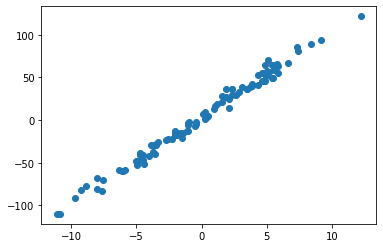

In [40]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

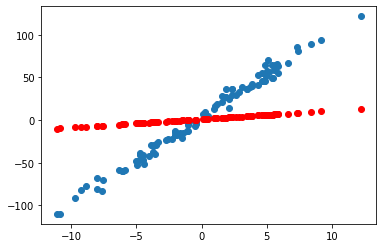

In [56]:
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

def plot_model(q, w):
  plt.scatter(x, y)
  plt.scatter(x, q.detach() * x + w.detach(), color='red')

plot_model(a, b)

In [57]:
lr = 0.001
for i in range(100):
  error = torch.mean((x * a + b - y) ** 2)

  print(error.detach())

  error.backward()

  with torch.no_grad():
    a -= lr * a.grad
    b -= lr * b.grad

  a.grad.zero_()
  b.grad.zero_()

tensor(1991.2350)
tensor(1810.2666)
tensor(1646.0376)
tensor(1496.9999)
tensor(1361.7473)
tensor(1239.0051)
tensor(1127.6157)
tensor(1026.5292)
tensor(934.7917)
tensor(851.5392)
tensor(775.9861)
tensor(707.4203)
tensor(645.1954)
tensor(588.7248)
tensor(537.4761)
tensor(490.9662)
tensor(448.7570)
tensor(410.4502)
tensor(375.6851)
tensor(344.1338)
tensor(315.4992)
tensor(289.5114)
tensor(265.9256)
tensor(244.5195)
tensor(225.0915)
tensor(207.4586)
tensor(191.4548)
tensor(176.9293)
tensor(163.7454)
tensor(151.7789)
tensor(140.9173)
tensor(131.0584)
tensor(122.1093)
tensor(113.9860)
tensor(106.6121)
tensor(99.9182)
tensor(93.8414)
tensor(88.3247)
tensor(83.3162)
tensor(78.7690)
tensor(74.6403)
tensor(70.8914)
tensor(67.4873)
tensor(64.3961)
tensor(61.5886)
tensor(59.0389)
tensor(56.7230)
tensor(54.6193)
tensor(52.7082)
tensor(50.9718)
tensor(49.3941)
tensor(47.9602)
tensor(46.6571)
tensor(45.4724)
tensor(44.3954)
tensor(43.4160)
tensor(42.5252)
tensor(41.7149)
tensor(40.9776)
tensor(40.306

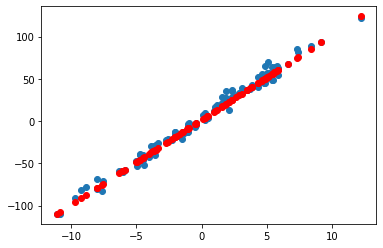

In [58]:
plot_model(a, b)

### 5) Non-linear regression example
